# Group 5 KDD Project - COVID19

### Team Member:  Osama Almasri, Sabda Karkera, Rishitha Muddana, Raga Preethi Potu, Ming Wu

## Data Preprocessing and Data Preparation

### Part 1. Import Libraries and Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()

In [2]:
df_covid19 = pd.read_csv("COVID-19_Nursing_Home_Dataset.csv", na_values='')

### Part 2. Understanding structure of data 

In [3]:
# check the number of rows and columns of the dataset.
df_covid19.shape

(123143, 59)

There are 123143 rows and 59 columns in this covid19 dataset

In [4]:
# show the first 5 rows of the dataset
df_covid19.head() 

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Submitted Data,Passed Quality Assurance Check,Residents Weekly Admissions COVID-19,...,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,County,Three or More Confirmed and Suspected COVID-19 Cases This Week,Initial Confirmed COVID-19 Case This Week,Geolocation
0,07/12/2020,215195,AUTUMN LAKE HEALTHCARE AT BRIDGEPARK,4017 LIBERTY HEIGHTS AVE.,BALTIMORE,MD,21207,Y,Y,0.0,...,0.0,Y,Y,756.4,89.7,11.9,Baltimore City,N,N,POINT (-76.687185 39.328731)
1,06/07/2020,225260,BLAIRE HOUSE OF MILFORD,20 CLAFLIN STREET,MILFORD,MA,1757,Y,Y,2.0,...,NaN,NaN,NaN,97.6,146.3,150.0,Worcester,N,N,POINT (-71.517285 42.137664)
2,05/24/2020,215044,ST. ELIZABETH REHAB. & NSG. CE,3320 BENSON AVENUE,BALTIMORE,MD,21227,Y,Y,3.0,...,NaN,NaN,NaN,59.7,14.9,25.0,Baltimore City,NaN,NaN,POINT (-76.669529 39.268871)
3,07/12/2020,165255,CARLISLE CENTER FOR WELLNESS AND REHAB,680 COLE STREET,CARLISLE,IA,50047,Y,Y,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,Warren,N,N,POINT (-93.493113 41.495666)
4,05/31/2020,185222,GOOD SHEPHERD HEALTH AND REHABILITATION,60 PHILLIPS BRANCH ROAD,PHELPS,KY,41553,N,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,Pike,NaN,NaN,POINT (-82.137144 37.495937)


In [5]:
# Show summary of the dataset. The dtype of this dataset includes integer, float, and object.
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123143 entries, 0 to 123142
Data columns (total 59 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   Week Ending                                                                  123143 non-null  object 
 1   Federal Provider Number                                                      123143 non-null  object 
 2   Provider Name                                                                123143 non-null  object 
 3   Provider Address                                                             123143 non-null  object 
 4   Provider City                                                                123143 non-null  object 
 5   Provider State                                                               123143 non-null  object 
 6   Provider Zip Code           

In [6]:
# Display the descriptive statistics.
df_covid19.describe()

,Provider Zip Code,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,...,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases
count,123143.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,...,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,4401.000000,4397.000000,118622.000000,118622.000000,42324.000000
mean,50334.207523,0.499958,3.006567,1.192973,7.755091,0.759914,4.706536,1.103620,6.820489,0.323073,...,4.993869,0.774500,4.694801,0.006375,0.038667,18.160873,2.692518,96.714207,27.179468,39.148079
std,26870.572193,2.871143,9.465077,6.747503,19.600166,4.791565,14.557006,5.365655,19.176798,2.141717,...,11.564300,12.123075,35.206590,0.136308,0.364773,15.975764,7.807690,248.002195,80.371290,157.089631
min,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,48855.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,14.700000
75%,72855.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,1.000000,8.000000,0.000000,...,4.000000,0.000000,3.000000,0.000000,0.000000,25.000000,0.000000,37.000000,0.000000,34.700000
max,99929.000000,224.000000,249.000000,222.000000,318.000000,289.000000,453.000000,522.000000,1552.000000,91.000000,...,289.000000,3728.000000,3731.000000,11.000000,22.000000,141.000000,102.000000,12000.000000,3000.000000,8600.000000


### Part 3: Identifying Numerical and Categorical data

In [7]:
#Looking at column names closely
df_covid19.columns

Index(['Week Ending', 'Federal Provider Number', 'Provider Name',
       'Provider Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Submitted Data', 'Passed Quality Assurance Check',
       'Residents Weekly Admissions COVID-19',
       'Residents Total Admissions COVID-19',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19',
       'Residents Weekly Suspected COVID-19',
       'Residents Total Suspected COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Resident Access to Testing in Facility',
       'Laboratory Type Is State Health Dept',
       'Laboratory Type Is Private Lab', 'Laboratory Type Is Other',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Staff Weekly Suspected COVID-19', 'Staff Total Suspected COV

In [8]:
# Fix the space issues in column names
df_covid19.columns = df_covid19.columns.str.replace(" ", "") #Remove the space

In [9]:
# Check if space got removed
df_covid19.columns

Index(['WeekEnding', 'FederalProviderNumber', 'ProviderName',
       'ProviderAddress', 'ProviderCity', 'ProviderState', 'ProviderZipCode',
       'SubmittedData', 'PassedQualityAssuranceCheck',
       'ResidentsWeeklyAdmissionsCOVID-19', 'ResidentsTotalAdmissionsCOVID-19',
       'ResidentsWeeklyConfirmedCOVID-19', 'ResidentsTotalConfirmedCOVID-19',
       'ResidentsWeeklySuspectedCOVID-19', 'ResidentsTotalSuspectedCOVID-19',
       'ResidentsWeeklyAllDeaths', 'ResidentsTotalAllDeaths',
       'ResidentsWeeklyCOVID-19Deaths', 'ResidentsTotalCOVID-19Deaths',
       'NumberofAllBeds', 'TotalNumberofOccupiedBeds',
       'ResidentAccesstoTestinginFacility', 'LaboratoryTypeIsStateHealthDept',
       'LaboratoryTypeIsPrivateLab', 'LaboratoryTypeIsOther',
       'StaffWeeklyConfirmedCOVID-19', 'StaffTotalConfirmedCOVID-19',
       'StaffWeeklySuspectedCOVID-19', 'StaffTotalSuspectedCOVID-19',
       'StaffWeeklyCOVID-19Deaths', 'StaffTotalCOVID-19Deaths',
       'ShortageofNursingStaff', 'S

In [10]:
# Convert 'Y/N' indicators to '1/0'
df_covid19 = df_covid19.replace(to_replace = "Y", value = '1')
df_covid19 = df_covid19.replace(to_replace = "N", value = '0')


In [11]:
# Convert ProviderZipCode astype to object
df_covid19.ProviderZipCode = df_covid19.ProviderZipCode.astype('object')


In [12]:
# Show updated dtype of the dataset
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123143 entries, 0 to 123142
Data columns (total 59 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   WeekEnding                                                         123143 non-null  object 
 1   FederalProviderNumber                                              123143 non-null  object 
 2   ProviderName                                                       123143 non-null  object 
 3   ProviderAddress                                                    123143 non-null  object 
 4   ProviderCity                                                       123143 non-null  object 
 5   ProviderState                                                      123143 non-null  object 
 6   ProviderZipCode                                                    123143 non-null  object 
 7   SubmittedDa

### Part 4: Handling Missing Data and Erroneous Data

#### 4.1 Remove records with very poor information.

In [13]:
# Remove rows that have too much missing value
df_covid19 = df_covid19[df_covid19.isna().sum(axis=1) < 35]

In [14]:
df_covid19.shape

(119224, 59)

3,919 rows are removed due to lack of information.

#### 4.2 Removed erroneous data

Data quality checks were performed by CMS to identify instances where facilities may have entered incorrect data, such as entering cumulative counts over time instead of new cases, and other data entry errors. In these cases, CMS marked as 0 in the column titled “Passed Quality Assurance Check” and suggests not to include these data in the analyses in order to preserve the accuracy of the data presented.

For a detailed explanation of the CMS/CDC Nursing Home COVID-19 Data Quality Assurance Process, please click <a href="https://data.cms.gov/download/bqa5-3dzf/application%2Fpdf" target="_blank">here</a>.

In [15]:
to_drop=['0']

# Drop rows that are mark as Not SubmittedData and those didn't pass Quality Assurance Check.

df_covid19 = df_covid19[~df_covid19['PassedQualityAssuranceCheck'].isin(to_drop)]


In [16]:
df_covid19.PassedQualityAssuranceCheck.value_counts()


1    114982
Name: PassedQualityAssuranceCheck, dtype: int64

In [17]:
df_covid19.SubmittedData.value_counts()


1    114982
0      1126
Name: SubmittedData, dtype: int64

Since both columns have only one value, we remove them.

In [18]:
# Drop SubmittedData and PassedQualityAssuranceCheck columns
df_covid19.drop(['SubmittedData', 'PassedQualityAssuranceCheck'], axis = 1, inplace = True)

In [19]:
df_covid19.shape


(116108, 57)

#### 4.3 Remove columns with too many null value

In [20]:
# Check the percentage of null value of each column
for i in range(df_covid19.shape[1]):
    # count number of rows with missing values
    n_miss = df_covid19.iloc[:, i].isnull().sum()
    perc = n_miss / df_covid19.shape[0] * 100
    #print('> %s, Missing: %d (%.1f%%)' % (df_covid19.columns[i], n_miss, perc))
    print('> Column %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Column 0, Missing: 0 (0.0%)
> Column 1, Missing: 0 (0.0%)
> Column 2, Missing: 0 (0.0%)
> Column 3, Missing: 0 (0.0%)
> Column 4, Missing: 0 (0.0%)
> Column 5, Missing: 0 (0.0%)
> Column 6, Missing: 0 (0.0%)
> Column 7, Missing: 0 (0.0%)
> Column 8, Missing: 0 (0.0%)
> Column 9, Missing: 0 (0.0%)
> Column 10, Missing: 0 (0.0%)
> Column 11, Missing: 0 (0.0%)
> Column 12, Missing: 0 (0.0%)
> Column 13, Missing: 0 (0.0%)
> Column 14, Missing: 0 (0.0%)
> Column 15, Missing: 0 (0.0%)
> Column 16, Missing: 0 (0.0%)
> Column 17, Missing: 1207 (1.0%)
> Column 18, Missing: 250 (0.2%)
> Column 19, Missing: 1141 (1.0%)
> Column 20, Missing: 1141 (1.0%)
> Column 21, Missing: 1141 (1.0%)
> Column 22, Missing: 1141 (1.0%)
> Column 23, Missing: 0 (0.0%)
> Column 24, Missing: 0 (0.0%)
> Column 25, Missing: 0 (0.0%)
> Column 26, Missing: 0 (0.0%)
> Column 27, Missing: 0 (0.0%)
> Column 28, Missing: 0 (0.0%)
> Column 29, Missing: 1561 (1.3%)
> Column 30, Missing: 1563 (1.3%)
> Column 31, Missing: 1560

More than 2/3 of column 46, 47, 48, 49 and 52 are null value, so we remove these columns.

In [21]:
df_covid19.drop(["NumberofVentilatorsinFacility", "NumberofVentilatorsinUseforCOVID-19", "AnyCurrentSupplyofVentilatorSupplies", "One-WeekSupplyofVentilatorSupplies", "TotalResidentsCOVID-19DeathsasaPercentageofConfirmedCOVID-19Cases"], axis = 1, inplace = True)

In [22]:
df_covid19.shape


(116108, 52)

### Part 5: Outlier

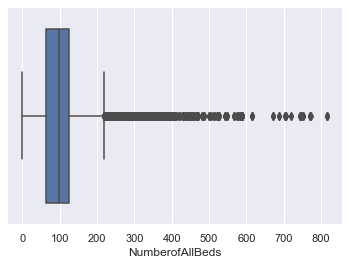

In [24]:
sns.boxplot(x=df_covid19['NumberofAllBeds'])

The capacity (e.g. number of beds) of nursing homes are different from one another. The above data set, the outliers included, does not indicate any unreasonable number of beds (i.e., all seem legitimate). Therefore, we don't eliminate the outliers in this case.

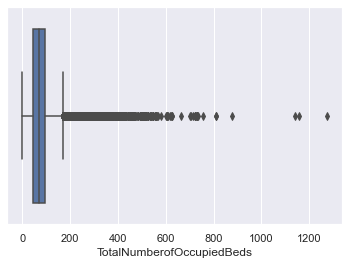

In [24]:
sns.boxplot(x=df_covid19['TotalNumberofOccupiedBeds'])

In [25]:
df_covid19['NumberofAllBeds'].max()

815.0

In [26]:
df_covid19['TotalNumberofOccupiedBeds'].max()

1274.0

Given that the maximum capacity of all nursing homes in the dataset is 815, it is impossible for the number of occupied beds of any nursing home in the dataset to exceed 815. Therefore, we cap the number of occupied beds at a given nursing home at the capacity of that nursing home, i.e., 100% occupancy.

In [27]:
# If NumOccupiedBed Exceed max of Total#ofBeds, set it to its corresponding total#ofBeds
df_covid19.loc[df_covid19['TotalNumberofOccupiedBeds'] > df_covid19['NumberofAllBeds'], 'TotalNumberofOccupiedBeds'] = df_covid19['NumberofAllBeds']

In [28]:
df_covid19['TotalNumberofOccupiedBeds'].max()

733.0

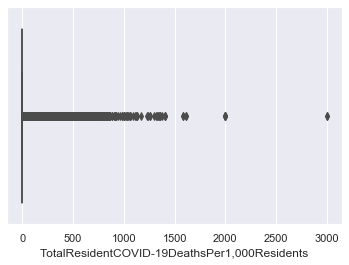

In [29]:
sns.boxplot(x=df_covid19['TotalResidentCOVID-19DeathsPer1,000Residents'])
# 52 records > 1000

Clearly the number of death per 1000 residents should not exceed 1000. The above boxplot shows that there are scores of data points demonstrating the contrary. Therefore, we remove these points.

In [30]:
#remove records that don't make sense

df_covid19.drop(df_covid19[df_covid19['TotalResidentCOVID-19DeathsPer1,000Residents'] > 1000].index, inplace=True)

In [31]:
df_covid19.shape

(116065, 52)

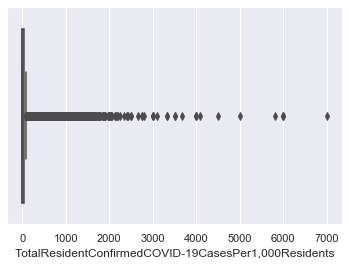

In [32]:
sns.boxplot(x=df_covid19['TotalResidentConfirmedCOVID-19CasesPer1,000Residents'])
##1563 records > 1000

Same reason as above, we remove those data points exceed 1000.

In [33]:
df_covid19.drop(df_covid19[df_covid19['TotalResidentConfirmedCOVID-19CasesPer1,000Residents'] > 1000].index, inplace=True)

In [34]:
df_covid19.shape

(114523, 52)

### Part 6: Imputation


In [35]:
df_covid19.isnull().sum().sort_values(ascending=False).head()

InitialConfirmedCOVID-19CaseThisWeek                     14671
ThreeorMoreConfirmedandSuspectedCOVID-19CasesThisWeek    14670
Geolocation                                               6105
VentilatorDependentUnit                                   3529
One-WeekSupplyofHandSanitizer                             1642
dtype: int64

In [36]:
for col_name in df_covid19.columns:
    if df_covid19[col_name].dtypes == 'object':
        #print ("The mode of '{col_name}': '{mode}'".format(col_name=col_name, mode=df_covid19[col_name].mode().iloc[0]))
        df_covid19[col_name] = df_covid19[col_name].fillna(df_covid19[col_name].mode().iloc[0])
    else:
        #print ("The mean of '{col_name}': '{mean}'".format(col_name=col_name, mean=df_covid19[col_name].mean()))
        df_covid19[col_name] = df_covid19[col_name].fillna(df_covid19[col_name].mean())

In [37]:
df_covid19.isnull().sum().sort_values(ascending=False).head()

Geolocation                             0
InitialConfirmedCOVID-19CaseThisWeek    0
StaffWeeklyConfirmedCOVID-19            0
LaboratoryTypeIsOther                   0
LaboratoryTypeIsPrivateLab              0
dtype: int64

In [38]:
df_covid19.to_csv('cleaned.csv')

### Part 7: Normalize and Scale Data

In [39]:
#print out the varainces 
print(df_covid19.var())

ProviderZipCode                                         7.149574e+08
ResidentsWeeklyAdmissionsCOVID-19                       5.732423e+00
ResidentsTotalAdmissionsCOVID-19                        7.886662e+01
ResidentsWeeklyConfirmedCOVID-19                        2.788683e+01
ResidentsTotalConfirmedCOVID-19                         2.925119e+02
ResidentsWeeklySuspectedCOVID-19                        1.371986e+01
ResidentsTotalSuspectedCOVID-19                         1.861854e+02
ResidentsWeeklyAllDeaths                                1.467509e+01
ResidentsTotalAllDeaths                                 1.964439e+02
ResidentsWeeklyCOVID-19Deaths                           2.852646e+00
ResidentsTotalCOVID-19Deaths                            3.492459e+01
NumberofAllBeds                                         3.410850e+03
TotalNumberofOccupiedBeds                               2.068689e+03
StaffWeeklyConfirmedCOVID-19                            9.817778e+00
StaffTotalConfirmedCOVID-19       

In [40]:
# #Normalize data using log normalization
# df_covid19["ProviderZipCode_log"] = np.log(df_covid19["ProviderZipCode"])
# df_covid19["ResidentsWeeklyAdmissionsCOVID-19_log"] = np.log(df_covid19["ResidentsWeeklyAdmissionsCOVID-19"])
# df_covid19["ResidentsTotalAdmissionsCOVID-19_log"] = np.log(df_covid19["ResidentsTotalAdmissionsCOVID-19"])
# df_covid19["ResidentsWeeklyConfirmedCOVID-19_log"] = np.log(df_covid19["ResidentsWeeklyConfirmedCOVID-19"])
# df_covid19["ResidentsTotalConfirmedCOVID-19_log"] = np.log(df_covid19["ResidentsTotalConfirmedCOVID-19"])
# df_covid19["ResidentsWeeklySuspectedCOVID-19_log"] = np.log(df_covid19["ResidentsWeeklySuspectedCOVID-19"])
# df_covid19["ResidentsTotalSuspectedCOVID-19_log"] = np.log(df_covid19["ResidentsTotalSuspectedCOVID-19"])
# df_covid19["ResidentsWeeklyAllDeaths_log"] = np.log(df_covid19["ResidentsWeeklyAllDeaths"])
# df_covid19["ResidentsWeeklyCOVID-19Deaths_log"] = np.log(df_covid19["ResidentsWeeklyCOVID-19Deaths"])
# df_covid19["ResidentsTotalAllDeaths_log"] = np.log(df_covid19["ResidentsTotalAllDeaths"])
# df_covid19["ResidentsTotalCOVID-19Deaths_log"] = np.log(df_covid19["ResidentsTotalCOVID-19Deaths"])
# df_covid19["NumberofAllBeds_log"] = np.log(df_covid19["NumberofAllBeds"])
# df_covid19["TotalNumberofOccupiedBeds_log"] = np.log(df_covid19["TotalNumberofOccupiedBeds"])
# df_covid19["StaffWeeklyConfirmedCOVID-19_log"] = np.log(df_covid19["StaffWeeklyConfirmedCOVID-19"])
# df_covid19["StaffTotalConfirmedCOVID-19_log"] = np.log(df_covid19["StaffTotalConfirmedCOVID-19"])
# df_covid19["StaffWeeklySuspectedCOVID-19_log"] = np.log(df_covid19["StaffWeeklySuspectedCOVID-19"])
# df_covid19["StaffTotalSuspectedCOVID-19_log"] = np.log(df_covid19["StaffTotalSuspectedCOVID-19"])
# df_covid19["TotalResidentConfirmedCOVID-19CasesPer1,000Residents_log"] = np.log(df_covid19["TotalResidentConfirmedCOVID-19CasesPer1,000Residents"])
# df_covid19["TotalResidentCOVID-19DeathsPer1,000Residents_log"] = np.log(df_covid19["TotalResidentCOVID-19DeathsPer1,000Residents"])

# #print new variances
# print(df_covid19["ProviderZipCode_log"].var())
# print(df_covid19["ResidentsWeeklyAdmissionsCOVID-19_log"].var())
# print(df_covid19["ResidentsTotalAdmissionsCOVID-19_log"].var())
# print(df_covid19["ResidentsWeeklyConfirmedCOVID-19_log"].var()) 
# print(df_covid19["ResidentsTotalConfirmedCOVID-19_log"].var()) 
# print(df_covid19["ResidentsWeeklySuspectedCOVID-19_log"].var()) 
# print(df_covid19["ResidentsTotalSuspectedCOVID-19_log"].var()) 
# print(df_covid19["ResidentsWeeklyAllDeaths_log"].var())
# print(df_covid19["ResidentsWeeklyCOVID-19Deaths_log"].var())
# print(df_covid19["ResidentsTotalAllDeaths_log"].var()) 
# print(df_covid19["ResidentsTotalCOVID-19Deaths_log"].var())
# print(df_covid19["NumberofAllBeds_log"].var())
# print(df_covid19["TotalNumberofOccupiedBeds_log"].var()) 
# print(df_covid19["StaffWeeklyConfirmedCOVID-19_log"].var())
# print(df_covid19["StaffTotalConfirmedCOVID-19_log"].var())
# print(df_covid19["StaffWeeklySuspectedCOVID-19_log"].var()) 
# print(df_covid19["StaffTotalSuspectedCOVID-19_log"].var()) 
# print(df_covid19["TotalResidentConfirmedCOVID-19CasesPer1,000Residents_log"].var()) 
# print(df_covid19["TotalResidentCOVID-19DeathsPer1,000Residents_log"].var()) 

In [41]:
# #Scale the data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_scaled = df_covid19[['ProviderZipCode','ResidentsTotalAdmissionsCOVID-19','ResidentsTotalAdmissionsCOVID-19','ResidentsWeeklyConfirmedCOVID-19','ResidentsTotalConfirmedCOVID-19','ResidentsWeeklySuspectedCOVID-19','ResidentsTotalSuspectedCOVID-19','ResidentsWeeklyAllDeaths','ResidentsWeeklyCOVID-19Deaths','ResidentsTotalAllDeaths','ResidentsTotalCOVID-19Deaths','TotalNumberofOccupiedBeds','NumberofAllBeds','StaffWeeklyConfirmedCOVID-19','StaffTotalConfirmedCOVID-19','StaffWeeklySuspectedCOVID-19','StaffTotalSuspectedCOVID-19','TotalResidentConfirmedCOVID-19CasesPer1,000Residents','TotalResidentCOVID-19DeathsPer1,000Residents']]
# subset_scaled = scaler.fit_transform(df_scaled)

# print(df_scaled.var())

In [42]:
#Create a new variable: OccupancyRatio

#df_covid19= pd.DataFrame(df_covid19)
df_covid19['CovidtoOccupancyRatio']=df_covid19['ResidentsWeeklyConfirmedCOVID-19']/df_covid19['TotalNumberofOccupiedBeds']

df_covid19.replace([np.inf, -np.inf], np.nan, inplace=True)
df_covid19.replace(np.where(df_covid19['CovidtoOccupancyRatio'].values >= np.finfo(np.float64).max), np.nan, inplace=True)
df_covid19 = df_covid19[df_covid19['CovidtoOccupancyRatio'].notna()]


#df_covid19 = df_covid19[df_covid19['CovidtoOccupancyRatio'].notna()]
#df_covid19 = df_covid19.drop(df_covid19[np.where(df_covid19['CovidtoOccupancyRatio'].values >= np.finfo(np.float64).max)].index, axis=0, inplace=True)
#df_covid19 = df_covid19[np.where(df_covid19['CovidtoOccupancyRatio'].values < np.finfo(np.float64).max)]
df_covid19.head()


/Users/sabdakarkera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


,WeekEnding,FederalProviderNumber,ProviderName,ProviderAddress,ProviderCity,ProviderState,ProviderZipCode,ResidentsWeeklyAdmissionsCOVID-19,ResidentsTotalAdmissionsCOVID-19,ResidentsWeeklyConfirmedCOVID-19,...,AnyCurrentSupplyofHandSanitizer,One-WeekSupplyofHandSanitizer,VentilatorDependentUnit,"TotalResidentConfirmedCOVID-19CasesPer1,000Residents","TotalResidentCOVID-19DeathsPer1,000Residents",County,ThreeorMoreConfirmedandSuspectedCOVID-19CasesThisWeek,InitialConfirmedCOVID-19CaseThisWeek,Geolocation,CovidtoOccupancyRatio
0,07/12/2020,215195,AUTUMN LAKE HEALTHCARE AT BRIDGEPARK,4017 LIBERTY HEIGHTS AVE.,BALTIMORE,MD,21207,0.0,4.0,0.0,...,1,1,1,756.4,89.7,Baltimore City,0,0,POINT (-76.687185 39.328731),0.000000
1,06/07/2020,225260,BLAIRE HOUSE OF MILFORD,20 CLAFLIN STREET,MILFORD,MA,1757,2.0,8.0,0.0,...,1,1,0,97.6,146.3,Worcester,0,0,POINT (-71.517285 42.137664),0.000000
2,05/24/2020,215044,ST. ELIZABETH REHAB. & NSG. CE,3320 BENSON AVENUE,BALTIMORE,MD,21227,3.0,3.0,8.0,...,1,1,0,59.7,14.9,Baltimore City,0,0,POINT (-76.669529 39.268871),0.059701
3,07/12/2020,165255,CARLISLE CENTER FOR WELLNESS AND REHAB,680 COLE STREET,CARLISLE,IA,50047,0.0,0.0,0.0,...,1,1,0,0.0,0.0,Warren,0,0,POINT (-93.493113 41.495666),0.000000
4,05/31/2020,185222,GOOD SHEPHERD HEALTH AND REHABILITATION,60 PHILLIPS BRANCH ROAD,PHELPS,KY,41553,0.0,0.0,0.0,...,1,1,0,0.0,0.0,Pike,0,0,POINT (-82.137144 37.495937),0.000000


In [43]:
# Look at statistical analysis of OccupancyRatio column
df_covid19['CovidtoOccupancyRatio'].describe()

count    114059.000000
mean          0.010907
std           0.061609
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CovidtoOccupancyRatio, dtype: float64

In [44]:
# Create TotalConfirmedCovid19Ratio to see if this feature proves to be a better dependent variable for testing models
df_covid19['TotalConfirmedCovid19Ratio']=(df_covid19['ResidentsTotalConfirmedCOVID-19']+df_covid19['StaffTotalConfirmedCOVID-19'])/df_covid19['NumberofAllBeds']
#df_covid19 = df_covid19[df_covid19['CovidtoOccupancyRatio'].notna()]
#df_covid19 = df_covid19.drop(df_covid19[np.where(df_covid19['CovidtoOccupancyRatio'].values >= np.finfo(np.float64).max)].index, axis=0, inplace=True)
#df_covid19 = df_covid19[np.where(df_covid19['CovidtoOccupancyRatio'].values < np.finfo(np.float64).max)]


In [45]:
# Describe TotalConfirmedCovid19Ratio
df_covid19['TotalConfirmedCovid19Ratio'].describe()

count    114059.000000
mean          0.087394
std           0.181319
min           0.000000
25%           0.000000
50%           0.007937
75%           0.066667
max           4.000000
Name: TotalConfirmedCovid19Ratio, dtype: float64

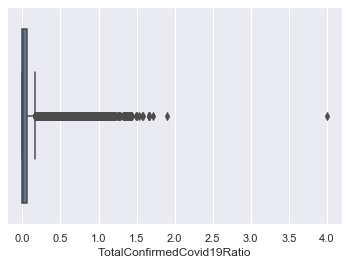

In [46]:
# Further investigation of TotalConfirmedCovid19Ratio through boxplot
sns.boxplot(x=df_covid19['TotalConfirmedCovid19Ratio'])

In [47]:
# Drop outlier
df_covid19.drop(df_covid19[df_covid19.TotalConfirmedCovid19Ratio > 3].index, inplace=True)

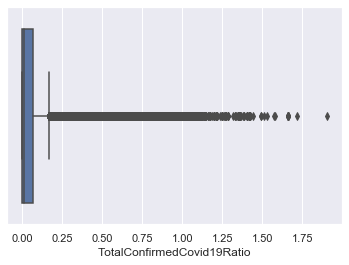

In [48]:
# Check result
sns.boxplot(x=df_covid19['TotalConfirmedCovid19Ratio'])

In [49]:
# Apply transfomer to column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

col_names = ['LaboratoryTypeIsStateHealthDept', 'LaboratoryTypeIsPrivateLab', 'LaboratoryTypeIsOther', 'ShortageofNursingStaff',
 'ShortageofClinicalStaff',
 'ShortageofAides',
 'ShortageofOtherStaff',
 'AnyCurrentSupplyofN95Masks',
 'One-WeekSupplyofN95Masks',
 'AnyCurrentSupplyofSurgicalMasks',
 'One-WeekSupplyofSurgicalMasks',
 'AnyCurrentSupplyofEyeProtection',
 'One-WeekSupplyofEyeProtection',
 'AnyCurrentSupplyofGowns',
 'One-WeekSupplyofGowns',
 'AnyCurrentSupplyofGloves',
 'One-WeekSupplyofGloves',
 'AnyCurrentSupplyofHandSanitizer',
 'One-WeekSupplyofHandSanitizer','CovidtoOccupancyRatio']
features = df_covid19[col_names]

ct = ColumnTransformer([
        ('scale', StandardScaler(), ['CovidtoOccupancyRatio'])
    ], remainder='passthrough')

ct.fit_transform(features)

array([[-0.1770127151734526, '1', '1', ..., '1', '1', '1'],
       [-0.1770127151734526, '0', '1', ..., '1', '1', '1'],
       [0.7920486725994375, '1', '0', ..., '1', '1', '1'],
       ...,
       [-0.1770127151734526, '0', '1', ..., '1', '1', '1'],
       [-0.1770127151734526, '0', '1', ..., '1', '1', '1'],
       [-0.1770127151734526, '1', '1', ..., '1', '1', '1']], dtype=object)

In [50]:
# df_covid19["CovidtoOccupancyRatio"] = np.log(df_covid19["CovidtoOccupancyRatio"])
# df_covid19.replace([np.inf, -np.inf], 0, inplace=True)

In [51]:
# Print head
df_covid19.head(20)

,WeekEnding,FederalProviderNumber,ProviderName,ProviderAddress,ProviderCity,ProviderState,ProviderZipCode,ResidentsWeeklyAdmissionsCOVID-19,ResidentsTotalAdmissionsCOVID-19,ResidentsWeeklyConfirmedCOVID-19,...,One-WeekSupplyofHandSanitizer,VentilatorDependentUnit,"TotalResidentConfirmedCOVID-19CasesPer1,000Residents","TotalResidentCOVID-19DeathsPer1,000Residents",County,ThreeorMoreConfirmedandSuspectedCOVID-19CasesThisWeek,InitialConfirmedCOVID-19CaseThisWeek,Geolocation,CovidtoOccupancyRatio,TotalConfirmedCovid19Ratio
0,07/12/2020,215195,AUTUMN LAKE HEALTHCARE AT BRIDGEPARK,4017 LIBERTY HEIGHTS AVE.,BALTIMORE,MD,21207,0.0,4.0,0.0,...,1,1,756.4,89.7,Baltimore City,0,0,POINT (-76.687185 39.328731),0.000000,0.806122
1,06/07/2020,225260,BLAIRE HOUSE OF MILFORD,20 CLAFLIN STREET,MILFORD,MA,1757,2.0,8.0,0.0,...,1,0,97.6,146.3,Worcester,0,0,POINT (-71.517285 42.137664),0.000000,0.109589
2,05/24/2020,215044,ST. ELIZABETH REHAB. & NSG. CE,3320 BENSON AVENUE,BALTIMORE,MD,21227,3.0,3.0,8.0,...,1,0,59.7,14.9,Baltimore City,0,0,POINT (-76.669529 39.268871),0.059701,0.148148
3,07/12/2020,165255,CARLISLE CENTER FOR WELLNESS AND REHAB,680 COLE STREET,CARLISLE,IA,50047,0.0,0.0,0.0,...,1,0,0.0,0.0,Warren,0,0,POINT (-93.493113 41.495666),0.000000,0.012500
4,05/31/2020,185222,GOOD SHEPHERD HEALTH AND REHABILITATION,60 PHILLIPS BRANCH ROAD,PHELPS,KY,41553,0.0,0.0,0.0,...,1,0,0.0,0.0,Pike,0,0,POINT (-82.137144 37.495937),0.000000,0.000000
5,06/28/2020,215181,OAKWOOD CARE CENTER,1300 WINDLASS DRIVE,BALTIMORE,MD,21220,0.0,2.0,0.0,...,1,0,30.0,0.0,Baltimore,0,0,POINT (-76.450123 39.335341),0.000000,0.046154
6,06/14/2020,165592,SAVANNAH HEIGHTS,601 S PRAIRIE STREET,MOUNT PLEASANT,IA,52641,3.0,3.0,0.0,...,1,0,0.0,0.0,Henry,0,0,POINT (-91.1047 40.796981),0.000000,0.000000
7,06/07/2020,195525,"WESTWOOD MANOR NURSING HOME, INC",714 HIGH SCHOOL DRIVE,DERIDDER,LA,70634,0.0,0.0,0.0,...,1,0,0.0,0.0,Beauregard,0,0,POINT (-93.294045 30.857585),0.000000,0.000000
8,06/28/2020,215065,BEL PRE HEALTHCARE CENTER,2601 BEL PRE ROAD,SILVER SPRING,MD,20906,0.0,4.0,0.0,...,1,0,568.2,11.4,Montgomery,0,0,POINT (-77.0534 39.090391),0.000000,0.663043
9,06/07/2020,195516,CAMELOT LEISURE LIVING,6818 HIGHWAY 84 WEST,FERRIDAY,LA,71334,0.0,0.0,0.0,...,1,0,0.0,0.0,Concordia,0,0,POINT (-91.534844 31.612567),0.000000,0.000000


In [52]:
# Make a list of column names
l_column = list(df_covid19.columns)
l_column

['WeekEnding',
 'FederalProviderNumber',
 'ProviderName',
 'ProviderAddress',
 'ProviderCity',
 'ProviderState',
 'ProviderZipCode',
 'ResidentsWeeklyAdmissionsCOVID-19',
 'ResidentsTotalAdmissionsCOVID-19',
 'ResidentsWeeklyConfirmedCOVID-19',
 'ResidentsTotalConfirmedCOVID-19',
 'ResidentsWeeklySuspectedCOVID-19',
 'ResidentsTotalSuspectedCOVID-19',
 'ResidentsWeeklyAllDeaths',
 'ResidentsTotalAllDeaths',
 'ResidentsWeeklyCOVID-19Deaths',
 'ResidentsTotalCOVID-19Deaths',
 'NumberofAllBeds',
 'TotalNumberofOccupiedBeds',
 'ResidentAccesstoTestinginFacility',
 'LaboratoryTypeIsStateHealthDept',
 'LaboratoryTypeIsPrivateLab',
 'LaboratoryTypeIsOther',
 'StaffWeeklyConfirmedCOVID-19',
 'StaffTotalConfirmedCOVID-19',
 'StaffWeeklySuspectedCOVID-19',
 'StaffTotalSuspectedCOVID-19',
 'StaffWeeklyCOVID-19Deaths',
 'StaffTotalCOVID-19Deaths',
 'ShortageofNursingStaff',
 'ShortageofClinicalStaff',
 'ShortageofAides',
 'ShortageofOtherStaff',
 'AnyCurrentSupplyofN95Masks',
 'One-WeekSupplyofN95

Create Independent and Dependant Variables:

In [53]:
# Drop CovidtoOccupancyRatio 
df_covid19 = df_covid19.drop(columns = ['CovidtoOccupancyRatio'])

In [54]:
# Make a list of column names
l_column = list(df_covid19.columns)
l_column

['WeekEnding',
 'FederalProviderNumber',
 'ProviderName',
 'ProviderAddress',
 'ProviderCity',
 'ProviderState',
 'ProviderZipCode',
 'ResidentsWeeklyAdmissionsCOVID-19',
 'ResidentsTotalAdmissionsCOVID-19',
 'ResidentsWeeklyConfirmedCOVID-19',
 'ResidentsTotalConfirmedCOVID-19',
 'ResidentsWeeklySuspectedCOVID-19',
 'ResidentsTotalSuspectedCOVID-19',
 'ResidentsWeeklyAllDeaths',
 'ResidentsTotalAllDeaths',
 'ResidentsWeeklyCOVID-19Deaths',
 'ResidentsTotalCOVID-19Deaths',
 'NumberofAllBeds',
 'TotalNumberofOccupiedBeds',
 'ResidentAccesstoTestinginFacility',
 'LaboratoryTypeIsStateHealthDept',
 'LaboratoryTypeIsPrivateLab',
 'LaboratoryTypeIsOther',
 'StaffWeeklyConfirmedCOVID-19',
 'StaffTotalConfirmedCOVID-19',
 'StaffWeeklySuspectedCOVID-19',
 'StaffTotalSuspectedCOVID-19',
 'StaffWeeklyCOVID-19Deaths',
 'StaffTotalCOVID-19Deaths',
 'ShortageofNursingStaff',
 'ShortageofClinicalStaff',
 'ShortageofAides',
 'ShortageofOtherStaff',
 'AnyCurrentSupplyofN95Masks',
 'One-WeekSupplyofN95

In [55]:
# Describe CovidtoOccupancyRatio
df_covid19['TotalConfirmedCovid19Ratio'].describe()

count    114058.000000
mean          0.087360
std           0.180950
min           0.000000
25%           0.000000
50%           0.007921
75%           0.066667
max           1.904110
Name: TotalConfirmedCovid19Ratio, dtype: float64

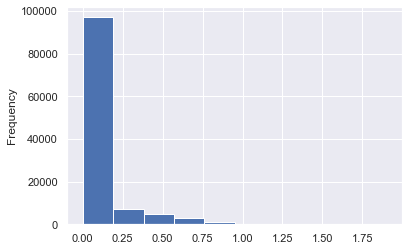

In [56]:
# Plot TotalConfirmedCovid19Ratio
df_covid19['TotalConfirmedCovid19Ratio'].plot(kind='hist')

In [57]:
# Create bins
cut_labels_3 = ['low', 'medium', 'high']
cut_bins = [0, .10, .4, 1]
df_covid19['ConfirmedCases'] = pd.cut(df_covid19['TotalConfirmedCovid19Ratio'], bins=cut_bins, labels=cut_labels_3)

In [58]:
# Value counts to see distribution
df_covid19['ConfirmedCases'].value_counts()

low       36043
medium    14644
high       8736
Name: ConfirmedCases, dtype: int64

In [59]:
# Show null amount 
sum(pd.isnull(df_covid19['ConfirmedCases']))

54635

In [60]:
# Remove nulls
df_covid19 = df_covid19.dropna(axis=0, subset=['ConfirmedCases'])

In [61]:
# Print counts
df_covid19['ConfirmedCases'].value_counts()

low       36043
medium    14644
high       8736
Name: ConfirmedCases, dtype: int64

In [62]:
# Create x y for train test split
X= df_covid19[['LaboratoryTypeIsStateHealthDept', 'LaboratoryTypeIsPrivateLab', 'LaboratoryTypeIsOther', 'ShortageofNursingStaff',
 'ShortageofClinicalStaff',
 'ShortageofAides',
 'ShortageofOtherStaff',
 'AnyCurrentSupplyofN95Masks',
 'One-WeekSupplyofN95Masks',
 'AnyCurrentSupplyofSurgicalMasks',
 'One-WeekSupplyofSurgicalMasks',
 'AnyCurrentSupplyofEyeProtection',
 'One-WeekSupplyofEyeProtection',
 'AnyCurrentSupplyofGowns',
 'One-WeekSupplyofGowns',
 'AnyCurrentSupplyofGloves',
 'One-WeekSupplyofGloves',
 'AnyCurrentSupplyofHandSanitizer',
 'One-WeekSupplyofHandSanitizer',]]

# discretize using new feature 
y= df_covid19[['ConfirmedCases']]


In [63]:
# Train test split and train decision tree and random forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train Test Split:

In [64]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (41596, 19)
Test feature set size: (17827, 19)
Training variable set size: (41596, 1)
Test variable set size: (17827, 1)


In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=600, random_state=123)

In [67]:
rfc.fit(X_train, y_train)

/Users/sabdakarkera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [68]:
#Prediction
rfc_pred = rfc.predict(X_test)

In [69]:
# Evaluate
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_test,rfc_pred)

In [70]:
#print cr
print(cr)

              precision    recall  f1-score   support

        high       0.45      0.04      0.07      2581
         low       0.61      0.98      0.76     10839
      medium       0.46      0.03      0.06      4407

    accuracy                           0.61     17827
   macro avg       0.51      0.35      0.30     17827
weighted avg       0.55      0.61      0.48     17827



In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=None, random_state=123)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [72]:
#Prediction
predictions = dtree.predict(X_test)

In [73]:
# Evaluation
from sklearn.metrics import classification_report,confusion_matrix
cr2 = classification_report(y_test,predictions)
print(cr2)

              precision    recall  f1-score   support

        high       0.38      0.04      0.08      2581
         low       0.62      0.98      0.76     10839
      medium       0.43      0.03      0.05      4407

    accuracy                           0.61     17827
   macro avg       0.48      0.35      0.30     17827
weighted avg       0.54      0.61      0.48     17827



In [74]:
#Evaluation using confustion matrix
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

#Accuracy
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[  109  2433    39]
 [  105 10606   128]
 [   73  4206   128]]
Accuracy of prediction: 0.601


In [75]:
#confusion matrix
cm

array([[  109,  2433,    39],
       [  105, 10606,   128],
       [   73,  4206,   128]])